<a href="https://colab.research.google.com/github/GeorgeTelles/retorno_IPOs/blob/main/Retorno_IPOs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
  <img src="https://raw.githubusercontent.com/GeorgeTelles/georgetelles/f69531ec6b293b5148563588a764c010015d315e/logo_clara.png" alt="logo clara" width="300" style="display: inline-block; vertical-align: top; margin-right: 10px;">
  <img src="https://raw.githubusercontent.com/GeorgeTelles/georgetelles/f69531ec6b293b5148563588a764c010015d315e/logo_dark.png" alt="logo dark" width="300" style="display: inline-block; vertical-align: top;">
</div>

# Análise de retorno de IPOs

A proposta dessa algoritmo é responder a seguinte pergunta: Será que investir em IPOs traz retornos financeiros significativos?

Para responder isso vou seguir as seguintes etapas:
1. Extrair os dados de cotações
2. Refinar os dados
3. Identificar a primeira data de cotação disponivel naquele ativo e pressupor que é a data de abertura da empresa na bolsa.
4. Diante dessa data, vou calcular o retorno da empresa até os dias de hoje

Observações:
Vou pegar as empresas listadas no Indice IBOV.

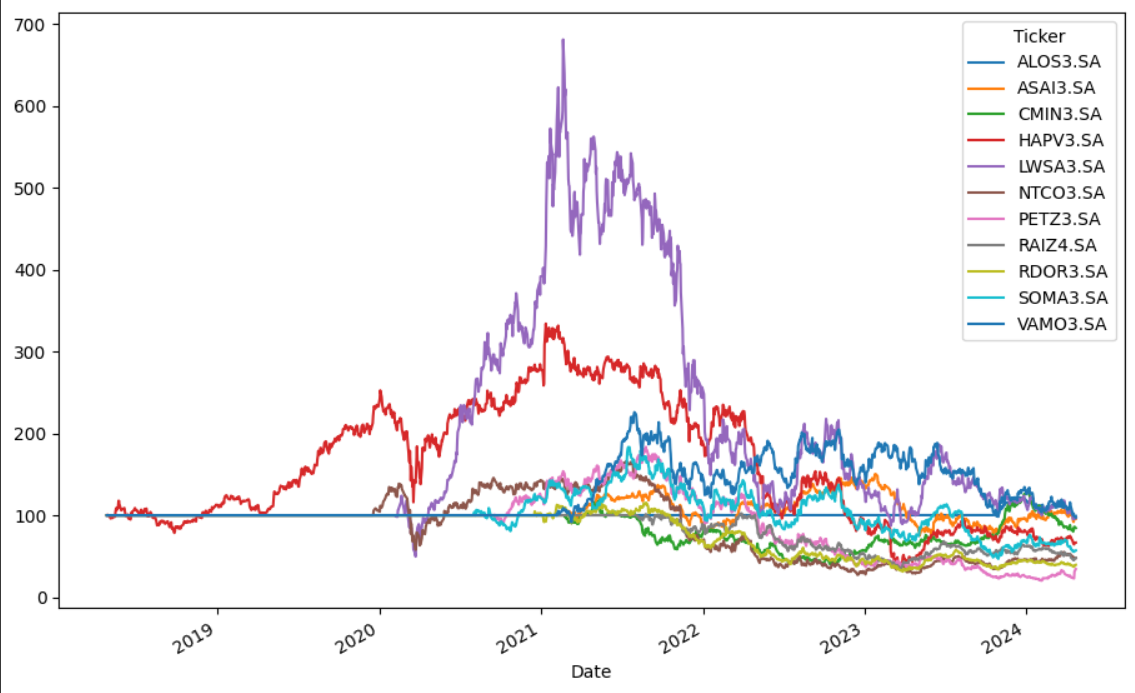

## Instalação e importação das bibliotecas

In [ ]:
!pip install tradingcomdados
from tradingcomdados import alternative_data as ad

In [ ]:
import yfinance as yf
import seaborn as sns
import pandas as pd

## Obtenção dos dados

In [ ]:
ibov = (ad.index_composition('ibov').cod)

In [ ]:
ibov = yf.download([i + '.SA' for i in ibov], start = '2010-01-01')['Adj Close']

## Obtendo o primeiro índice válido

In [ ]:
first_valid_index = ibov.apply(lambda x: x.first_valid_index(), axis = 0)

In [ ]:
first_valid_index

In [ ]:
ibov = ibov.dropna(axis = 1, how = 'all')

## Criando um loop

In [ ]:
ipo = dict()
dicionario = dict()

In [ ]:
for i in ibov.columns:
    local = ibov[i].dropna()
    df_normal = local/local.iloc[0]
    total_return = 100*(df_normal.iloc[-1] - 1)
    dicionario[i] = total_return
    ipo[i] = ibov[i].first_valid_index()

In [ ]:
acoes = pd.DataFrame({'retornos':dicionario, 'Data IPO': ipo})

**Ações que tiveram IPOs após 01-02-2010**

In [ ]:
acoes_filtr = acoes[acoes['Data IPO'] > "2010-02-01"]
acoes_filtr

**Grafico dos retornos das IPOs**

In [ ]:
sns.scatterplot(data = acoes_filtr, x = 'Data IPO', y = 'retornos')

**Numeros:**

In [ ]:
print(f"Temos {len(acoes_filtr)} IPOs")

In [ ]:
print(f"Dessas {len(acoes_filtr)} IPOs, {len(acoes_filtr[acoes_filtr['retornos']<0])} tiveram retornos acima de 0")

In [ ]:
print(f"{((len(acoes_filtr[acoes_filtr['retornos']<0]) / len(acoes_filtr))*100):.2f}% das IPOs analisadas tiveram retornos positivos")

## Visualização dos dados

In [ ]:
IPOs = yf.download(list(acoes_filtr.index), start = '2018-01-01')['Adj Close']

In [ ]:
IPOs = IPOs.bfill()
IPOs.plot(figsize=(16, 10));

# IPOs Ganhadoras

In [ ]:
gain = yf.download(list(acoes_filtr[acoes_filtr['retornos']>0].index), start = '2018-01-01')['Adj Close']

In [ ]:
gain = gain.bfill()
gain.plot(figsize=(16, 10))

# IPOs Perdedoras

In [ ]:
losers = yf.download(list(acoes_filtr[acoes_filtr['retornos']<0].index), start = '2018-01-01')['Adj Close']

In [ ]:
losers = losers.bfill()
losers.plot(figsize=(16, 10))

#Conclusão

**Pelos dados analisados, a maioria das IPOs não tem um bom retorno financeiro**

Observações Finais:
1. O metodo aqui utilizado para saber a data da IPO não foi um metodo acertivo.
2. Os ativos analisados foram as empresas que fazem parte do IBOV, o correto seria analisar todas as empresas da Bolsa, visto que se uma empresa faz parte do IBOV ela pode ser considerada uma das melhores.